In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [31]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('/content/diabetes.csv', header=None, names=col_names)
print(data.shape)
data.head()

(769, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [32]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [33]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = data[feature_cols]
y = data['label']


x = x.iloc[1:]
y = y.iloc[1:]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(537, 7)

(537,)

(231, 7)

(231,)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:

model = SVC(kernel='rbf')
model.fit(x_train, y_train)
svc_prediction = model.predict(x_test)

print("SVC predictions:")
print(svc_prediction)

SVC predictions:
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0'
 '0' '0' '1' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0'
 '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '1'
 '0' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '1'
 '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1'
 '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '0' '0' '1' '0' '1' '0' '0' '0'
 '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '1' '1' '0' '0' '0' '1' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0']


In [37]:
conf_mat = metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [kernel - rbf]')
print('Confusion Matrix:')
print(conf_mat)
print('\nAccuracy score:', metrics.accuracy_score(y_test, svc_prediction))
print('\nAccuracy in Percentage:')
print(classification_report(y_test, svc_prediction))

SVC [kernel - rbf]
Confusion Matrix:
[[137   9]
 [ 35  50]]

Accuracy score: 0.8095238095238095

Accuracy in Percentage:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       146
           1       0.85      0.59      0.69        85

    accuracy                           0.81       231
   macro avg       0.82      0.76      0.78       231
weighted avg       0.82      0.81      0.80       231



In [38]:
model = SVC(kernel='linear', random_state=0)
model.fit(x_train, y_train)
svc_prediction = model.predict(x_test)
print('SVC predictions:')
print(svc_prediction)

SVC predictions:
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '1'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0'
 '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '1'
 '1' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '1'
 '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1'
 '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '0' '0' '1' '0' '1' '0' '0' '0'
 '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '1' '1' '0' '0' '0' '1' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0']


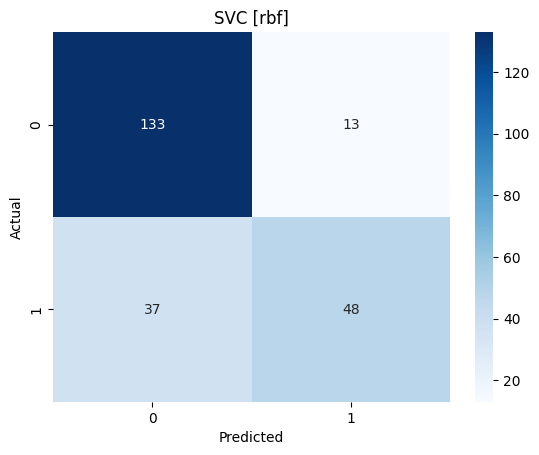

In [39]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
conf_mat = pd.crosstab(y_test, svc_prediction, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('SVC [rbf]')
plt.show()

In [40]:
conf_mat = metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [kernel - linear]')
print('Confusion Matrix:')
print(conf_mat)
print('\nAccuracy score:', metrics.accuracy_score(y_test, svc_prediction))
print('\nAccuracy in Percentage:')
print(classification_report(y_test, svc_prediction))

SVC [kernel - linear]
Confusion Matrix:
[[133  13]
 [ 37  48]]

Accuracy score: 0.7835497835497836

Accuracy in Percentage:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       146
           1       0.79      0.56      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



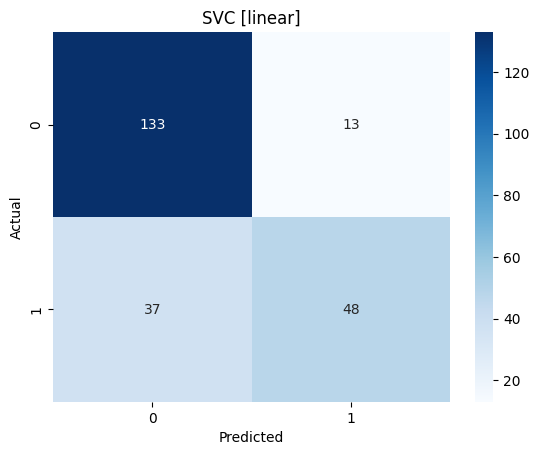

In [41]:
conf_mat = pd.crosstab(y_test, svc_prediction, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('SVC [linear]')
plt.show()